In [1]:
%matplotlib inline

In [2]:
# -*- coding: utf-8 -*-
import os
import sys
import glob
import dlib
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC

In [3]:
cat1_floder = './data/cat1/'
cat2_floder = './data/cat2/'

In [4]:
detector = dlib.simple_object_detector("detector.svm")

In [5]:
cat1_cnt = len([file for file in os.listdir(cat1_floder)])
cat2_cnt = len([file for file in os.listdir(cat2_floder)])
X = np.zeros((cat1_cnt+cat2_cnt,200,200,3)).astype(np.int)
y = np.zeros((cat1_cnt+cat2_cnt,1)).astype(np.int)
cnt = 0
print(X.shape)

(6, 200, 200, 3)


Processing file: ./data/cat1\cat1_0.jpg
Number of faces detected: 1
face 0; left 234; top 35; right 433; bottom 214


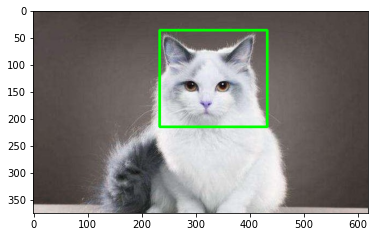

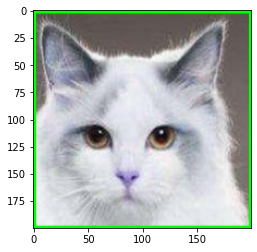

(200, 200, 3)
Processing file: ./data/cat1\cat1_1.jpg
Number of faces detected: 1
face 0; left 50; top 22; right 337; bottom 280


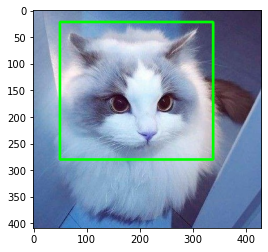

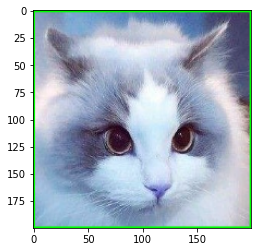

(200, 200, 3)
Processing file: ./data/cat1\cat1_2.jpg
Number of faces detected: 1
face 0; left 178; top 29; right 344; bottom 178


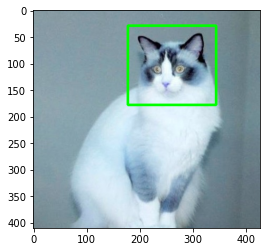

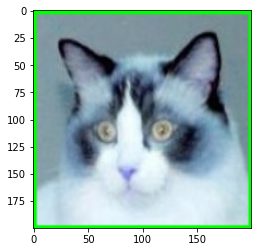

(200, 200, 3)


In [6]:
for f in glob.glob(cat1_floder+'*.jpg'):
    print("Processing file: {}".format(f))
    img = cv2.imread(f, cv2.IMREAD_COLOR)
    b, g, r = cv2.split(img)
    img2 = cv2.merge([r, g, b])
    dets = detector(img2)
    print("Number of faces detected: {}".format(len(dets)))
    for index, face in enumerate(dets):
        print('face {}; left {}; top {}; right {}; bottom {}'.format(index, face.left(), face.top(), face.right(), face.bottom()))
        left = face.left()
        top = face.top()
        right = face.right()
        bottom = face.bottom()
        cv2.rectangle(img, (left, top), (right, bottom), (0, 255, 0), 3)
        # cv2.namedWindow(f, cv2.WINDOW_AUTOSIZE)
        # cv2.imshow(f, img)
        face = cv2.resize(img[top:bottom,left:right],(200,200))
        plt.imshow(img)
        plt.show()
        plt.imshow(face)
        plt.show()
        print(face.shape)
        X[cnt] = face
        y[cnt] = 1
        cnt += 1

Processing file: ./data/cat2\cat2_0.jpg
Number of faces detected: 1
face 0; left 90; top 90; right 328; bottom 305


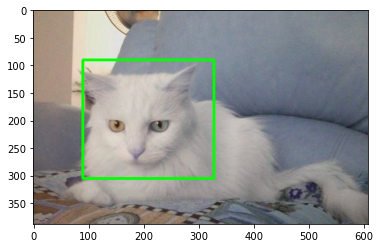

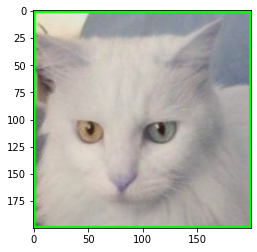

(200, 200, 3)
Processing file: ./data/cat2\cat2_1.jpg
Number of faces detected: 1
face 0; left 508; top 26; right 852; bottom 336


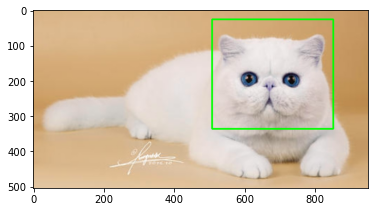

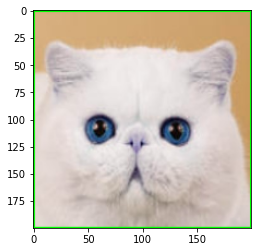

(200, 200, 3)
Processing file: ./data/cat2\cat2_2.jpg
Number of faces detected: 1
face 0; left 245; top 37; right 383; bottom 162


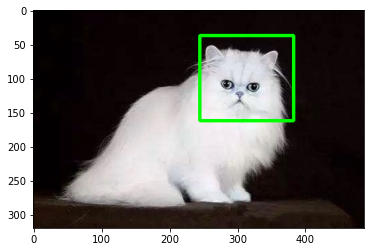

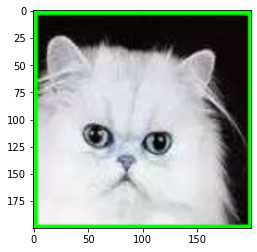

(200, 200, 3)


In [7]:
for f in glob.glob(cat2_floder+'*.jpg'):
    print("Processing file: {}".format(f))
    img = cv2.imread(f, cv2.IMREAD_COLOR)
    b, g, r = cv2.split(img)
    img2 = cv2.merge([r, g, b])
    dets = detector(img2)
    print("Number of faces detected: {}".format(len(dets)))
    for index, face in enumerate(dets):
        print('face {}; left {}; top {}; right {}; bottom {}'.format(index, face.left(), face.top(), face.right(), face.bottom()))
        left = face.left()
        top = face.top()
        right = face.right()
        bottom = face.bottom()
        cv2.rectangle(img, (left, top), (right, bottom), (0, 255, 0), 3)
        # cv2.namedWindow(f, cv2.WINDOW_AUTOSIZE)
        # cv2.imshow(f, img)
        face = cv2.resize(img[top:bottom,left:right],(200,200))
        plt.imshow(img)
        plt.show()
        plt.imshow(face)
        plt.show()
        print(face.shape)
        X[cnt] = face
        y[cnt] = 2
        cnt += 1

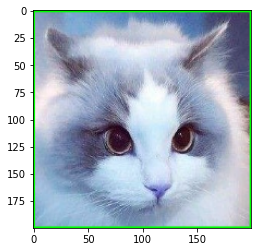

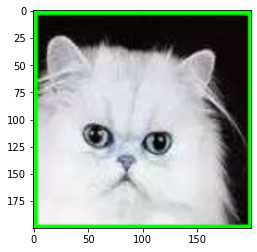

In [8]:
plt.imshow(X[1])
plt.show()
plt.imshow(X[5])
plt.show()

In [9]:
print(y)

[[1]
 [1]
 [1]
 [2]
 [2]
 [2]]


In [10]:
svc = SVC(kernel='rbf')

In [11]:
X = X.reshape(X.shape[0],-1)
y = y.ravel()
svc.fit(X,y)

SVC()

Processing file: ./data/cattest/cattest_0.jpg
Number of faces detected: 1
face 0; left 321; top 32; right 734; bottom 404


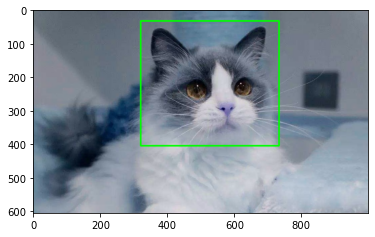

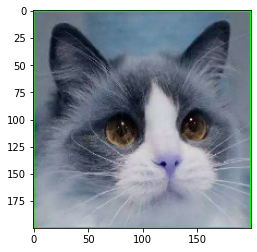

(200, 200, 3)


In [12]:
X_test = np.zeros((1,200,200,3)).astype(np.int)
test_cat_file = './data/cattest/cattest_0.jpg'
print("Processing file: {}".format(test_cat_file))
img = cv2.imread(test_cat_file, cv2.IMREAD_COLOR)
b, g, r = cv2.split(img)
img2 = cv2.merge([r, g, b])
dets = detector(img2)
print("Number of faces detected: {}".format(len(dets)))
for index, face in enumerate(dets):
    print('face {}; left {}; top {}; right {}; bottom {}'.format(index, face.left(), face.top(), face.right(), face.bottom()))
    left = face.left()
    top = face.top()
    right = face.right()
    bottom = face.bottom()
    cv2.rectangle(img, (left, top), (right, bottom), (0, 255, 0), 3)
    # cv2.namedWindow(f, cv2.WINDOW_AUTOSIZE)
    # cv2.imshow(f, img)
    face = cv2.resize(img[top:bottom,left:right],(200,200))
    plt.imshow(img)
    plt.show()
    plt.imshow(face)
    plt.show()
    print(face.shape)
    X_test[0] = face

In [13]:
X_test = X_test.reshape(X_test.shape[0],-1)
y_pred = svc.predict(X_test)
print('The cat is cat',y_pred[0])

The cat is cat 1
